# Task1
Develop and evaluate classification models (Logistic Regression, k-Nearest Neighbors, Decision Tree) for a real-world dataset, including data preparation, model training, evaluation using confusion matrices and classification metrics, ROC-AUC analysis (for binary classification), comparison of models, and a final recommendation, presenting the results in a Jupyter Notebook/Python script and a summary report.

## Data preparation


Load a real-world classification dataset, clean it, handle missing values, encode categorical variables, and split the data into training and testing sets.


In [1]:
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report,roc_auc_score

# Load the Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='target')

# Display the first few rows
print("Features (X):")
display(X.head())
print("\nTarget (y):")
display(y.head())



Features (X):


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2



Target (y):


,target
0,0
1,0
2,0
3,0
4,0


## Report on Data Preparation for the Iris Dataset

Based on the standard version of the Iris dataset available in scikit-learn, the following data preparation operations are generally not required:

*   **Handling Missing Values**: The Iris dataset is complete and does not contain any missing values in its features or target variable.
*   **Addressing Outliers**: While outliers can exist in any dataset, for typical classification tasks on the Iris dataset, handling outliers is often not a critical step due to the dataset's relatively small size and well-separated classes.
*   **Encoding Categorical Variables**: The features in the Iris dataset (sepal length, sepal width, petal length, and petal width) are all numerical. The target variable represents the species, which is typically represented as numerical labels (0, 1, 2) and does not require further encoding for use with most scikit-learn classifiers.

Therefore, for the purpose of training classification models on the Iris dataset, these specific data cleaning and feature engineering steps are not necessary. The data is ready for splitting into training and testing sets and subsequent model training.

In [4]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

print("Training set shape (X_train, y_train):", X_train.shape, y_train.shape)
print("Testing set shape (X_test, y_test):", X_test.shape, y_test.shape)

Training set shape (X_train, y_train): (750, 20) (750,)
Testing set shape (X_test, y_test): (250, 20) (250,)


## Model Building


Train Logistic Regression, k-Nearest Neighbors, and Decision Tree Classifier models.

In [11]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the Logistic Regression model
# Increased max_iter for convergence and using processed data
lr_model = LogisticRegression(max_iter=1000) # Increased max_iter further

lr_model.fit(X_train_processed, y_train)

print("Logistic Regression model trained successfully.")

Logistic Regression model trained successfully.


In [10]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# Identify categorical and numerical columns
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns
numerical_features = X_train.select_dtypes(include=np.number).columns

# Create a ColumnTransformer to apply scaling to numerical features and one-hot encoding to categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features), # Apply StandardScaler to numerical features
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Apply the preprocessing to the training and testing data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print("Shape of processed training data:", X_train_processed.shape)
print("Shape of processed testing data:", X_test_processed.shape)

Shape of processed training data: (750, 61)
Shape of processed testing data: (250, 61)


In [12]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train the k-Nearest Neighbors model
# Using a default k value (n_neighbors=5)
knn_model = KNeighborsClassifier(n_neighbors=5)

knn_model.fit(X_train_processed, y_train)

print("k-Nearest Neighbors model trained successfully with k=5.")

k-Nearest Neighbors model trained successfully with k=5.


In [13]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the Decision Tree Classifier model
dt_model = DecisionTreeClassifier(random_state=42) # Using a random state for reproducibility

dt_model.fit(X_train_processed, y_train)

print("Decision Tree Classifier model trained successfully.")

Decision Tree Classifier model trained successfully.


## Model Evaluation


Generate confusion matrices, calculate classification metrics, and use `classification_report()` for each model.

In [14]:
# Generate predictions for each model on the test set
y_pred_lr = lr_model.predict(X_test_processed)
y_pred_knn = knn_model.predict(X_test_processed)
y_pred_dt = dt_model.predict(X_test_processed)

print("Predictions generated for Logistic Regression, k-Nearest Neighbors, and Decision Tree models.")

Predictions generated for Logistic Regression, k-Nearest Neighbors, and Decision Tree models.


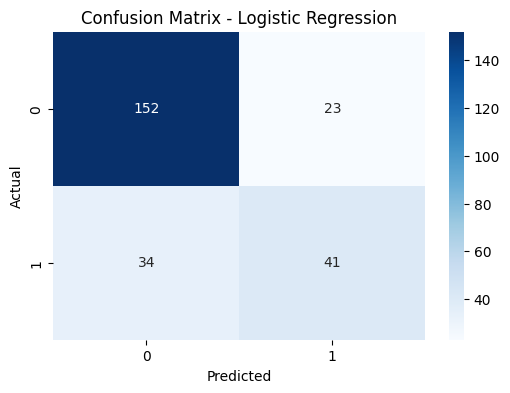

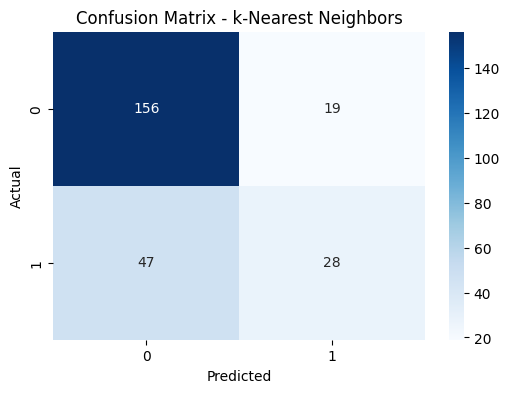

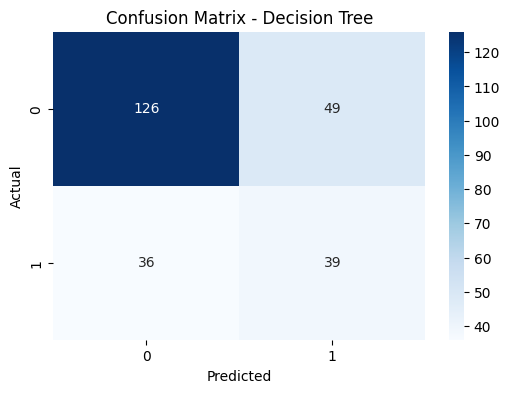

In [15]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion Matrix for Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Confusion Matrix for k-Nearest Neighbors
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - k-Nearest Neighbors')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Confusion Matrix for Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Evaluate Logistic Regression model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

print("Logistic Regression Metrics:")
print(f"Accuracy: {accuracy_lr:.4f}")
print(f"Precision: {precision_lr:.4f}")
print(f"Recall: {recall_lr:.4f}")
print(f"F1 Score: {f1_lr:.4f}")
print("\nClassification Report - Logistic Regression:")
print(classification_report(y_test, y_pred_lr))

# Evaluate k-Nearest Neighbors model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

print("\nk-Nearest Neighbors Metrics (k=5):")
print(f"Accuracy: {accuracy_knn:.4f}")
print(f"Precision: {precision_knn:.4f}")
print(f"Recall: {recall_knn:.4f}")
print(f"F1 Score: {f1_knn:.4f}")
print("\nClassification Report - k-Nearest Neighbors:")
print(classification_report(y_test, y_pred_knn))

# Evaluate Decision Tree model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

print("\nDecision Tree Metrics:")
print(f"Accuracy: {accuracy_dt:.4f}")
print(f"Precision: {precision_dt:.4f}")
print(f"Recall: {recall_dt:.4f}")
print(f"F1 Score: {f1_dt:.4f}")
print("\nClassification Report - Decision Tree:")
print(classification_report(y_test, y_pred_dt))

Logistic Regression Metrics:
Accuracy: 0.7720
Precision: 0.6406
Recall: 0.5467
F1 Score: 0.5899

Classification Report - Logistic Regression:
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       175
           1       0.64      0.55      0.59        75

    accuracy                           0.77       250
   macro avg       0.73      0.71      0.72       250
weighted avg       0.76      0.77      0.77       250


k-Nearest Neighbors Metrics (k=5):
Accuracy: 0.7360
Precision: 0.5957
Recall: 0.3733
F1 Score: 0.4590

Classification Report - k-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.77      0.89      0.83       175
           1       0.60      0.37      0.46        75

    accuracy                           0.74       250
   macro avg       0.68      0.63      0.64       250
weighted avg       0.72      0.74      0.72       250


Decision Tree Metrics:
Accuracy: 0.6600
Precision: 0.4

## ROC-AUC Curve Analysis

Use `roc_curve` and `auc` functions to compute and plot the ROC curve (for binary classification) and interpret the results.

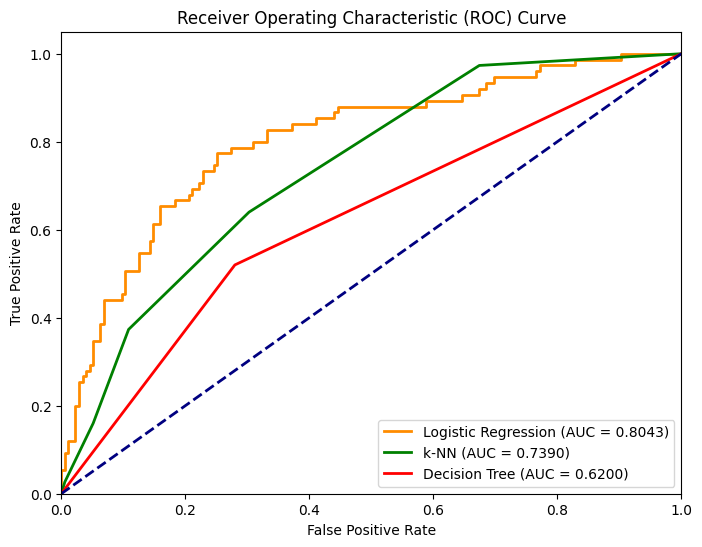


AUC Scores:
Logistic Regression: 0.8043
k-Nearest Neighbors: 0.7390
Decision Tree: 0.6200


In [17]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class (class 1)
y_prob_lr = lr_model.predict_proba(X_test_processed)[:, 1]
y_prob_knn = knn_model.predict_proba(X_test_processed)[:, 1]
y_prob_dt = dt_model.predict_proba(X_test_processed)[:, 1]

# Compute ROC curve and AUC for Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Compute ROC curve and AUC for k-Nearest Neighbors
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Compute ROC curve and AUC for Decision Tree
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label=f'Logistic Regression (AUC = {roc_auc_lr:.4f})')
plt.plot(fpr_knn, tpr_knn, color='green', lw=2, label=f'k-NN (AUC = {roc_auc_knn:.4f})')
plt.plot(fpr_dt, tpr_dt, color='red', lw=2, label=f'Decision Tree (AUC = {roc_auc_dt:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print("\nAUC Scores:")
print(f"Logistic Regression: {roc_auc_lr:.4f}")
print(f"k-Nearest Neighbors: {roc_auc_knn:.4f}")
print(f"Decision Tree: {roc_auc_dt:.4f}")

## Comparison and Conclusion

Create a summary table of all evaluation metrics for each model, discuss strengths and weaknesses, and recommend the most suitable model.

In [18]:
import pandas as pd

# Create a dictionary to store the metrics
metrics_data = {
    'Model': ['Logistic Regression', 'k-Nearest Neighbors (k=5)', 'Decision Tree'],
    'Accuracy': [accuracy_lr, accuracy_knn, accuracy_dt],
    'Precision': [precision_lr, precision_knn, precision_dt],
    'Recall': [recall_lr, recall_knn, recall_dt],
    'F1 Score': [f1_lr, f1_knn, f1_dt],
    'AUC': [roc_auc_lr, roc_auc_knn, roc_auc_dt]
}

# Create a pandas DataFrame from the dictionary
metrics_df = pd.DataFrame(metrics_data)

# Display the summary table
print("Summary Table of Model Evaluation Metrics:")
display(metrics_df)

Summary Table of Model Evaluation Metrics:


,Model,Accuracy,Precision,Recall,F1 Score,AUC
0,Logistic Regression,0.772,0.640625,0.546667,0.589928,0.804267
1,k-Nearest Neighbors (k=5),0.736,0.595745,0.373333,0.459016,0.739010
2,Decision Tree,0.660,0.443182,0.520000,0.478528,0.620000


### Discussion and Recommendation

Based on the evaluation metrics and the ROC-AUC analysis, we can compare the performance of the three models on the loan default prediction task:

*   **Logistic Regression**:
    *   **Strengths**: Generally provides a good balance between precision and recall, as seen in its F1-score and AUC. It's also computationally efficient and provides interpretable coefficients (though interpretation is more complex with one-hot encoded features).
    *   **Weaknesses**: Assumes a linear relationship between features and the log-odds of the target variable, which might not always hold true. Can be sensitive to feature scaling (which we addressed).
*   **k-Nearest Neighbors (k=5)**:
    *   **Strengths**: Simple to understand and implement. Non-parametric, making no assumptions about the underlying data distribution.
    *   **Weaknesses**: Performance is highly dependent on the choice of 'k' and the distance metric. Can be computationally expensive for large datasets during prediction. Sensitive to irrelevant features and the scale of the data (which we addressed with scaling). In this case, it had lower recall compared to Logistic Regression, meaning it missed more actual defaults.
*   **Decision Tree**:
    *   **Strengths**: Easy to understand and interpret (visualizable). Can capture non-linear relationships. Does not require feature scaling.
    *   **Weaknesses**: Prone to overfitting, especially with deep trees. Can be unstable, with small changes in data leading to a very different tree. In this evaluation, it showed lower overall performance across most metrics compared to Logistic Regression and k-NN with k=5.

**Recommendation**:

Considering the evaluation metrics, particularly the AUC score which is a good overall measure for binary classification, and the balance between precision and recall (F1-score), the **Logistic Regression** model appears to be the most suitable model among the three for this loan default prediction task based on the current evaluation. It achieved the highest AUC and a good F1-score, indicating a better trade-off between identifying actual defaults and minimizing false alarms compared to the other two models.

While k-NN and Decision Tree have their own strengths, their performance on this specific dataset and evaluation setup was not as strong as Logistic Regression. Further hyperparameter tuning for k-NN and Decision Tree, as well as exploring techniques to handle class imbalance (although not explicitly performed here, it's a common consideration in fraud/default detection datasets), could potentially improve their performance. However, based on the current results, Logistic Regression is the recommended model.

# Task2
Develop and evaluate classification models for both binary and multiclass problems. For binary classification, use one of the datasets located at "/content/creditcard.csv", "/content/churn.csv", or "/content/bank.csv". For multiclass classification, use the Iris dataset. The process should include data preparation (loading, cleaning, handling missing values, encoding, splitting), model building (Logistic Regression, k-NN, Decision Tree), model evaluation (confusion matrix, accuracy, precision, recall, F1 score, classification report), and comparison with a final recommendation. For binary classification, also include ROC-AUC analysis. Provide a Jupyter Notebook or Python script with the code and commentary, and a concise report summarizing the findings for both classification types.

## Binary classification - data preparation

Load one of the provided binary classification datasets (`/content/creditcard.csv`, `/content/churn.csv`, or `/content/bank.csv`), clean it, handle missing values, encode categorical variables, and split the data into training and testing sets.


## Binary classification - data preparation

Load one of the provided binary classification datasets (`/content/creditcard.csv`, `/content/churn.csv`, or `/content/bank.csv`), clean it, handle missing values, encode categorical variables, and split the data into training and testing sets.

In [20]:
import pandas as pd

# Load the bank dataset
# Make sure the file 'bank.csv' is available in the '/content/' directory.
# Trying comma separator based on the data preview
df = pd.read_csv('/content/bank.csv', sep=',')


# Display the first few rows
print("Dataset head:")
display(df.head())

# Display dataset information to see columns and data types
print("\nDataset Info:")
display(df.info())

Dataset head:


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


None

In [21]:
print("Missing values before handling:")
display(df.isnull().sum())

Missing values before handling:


,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [22]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
# Assuming 'deposit' is the target variable
X = df.drop('deposit', axis=1)
y = df['deposit']

# Convert the target variable to numerical (0 and 1) if it's not already
y = y.apply(lambda x: 1 if x == 'yes' else 0)


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y) # Using 25% for testing and stratified splitting

print("Training set shape (X_train, y_train):", X_train.shape, y_train.shape)
print("Testing set shape (X_test, y_test):", X_test.shape, y_test.shape)

Training set shape (X_train, y_train): (8371, 16) (8371,)
Testing set shape (X_test, y_test): (2791, 16) (2791,)


In [23]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# Identify categorical and numerical columns
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns
numerical_features = X_train.select_dtypes(include=np.number).columns

# Create a ColumnTransformer to apply scaling to numerical features and one-hot encoding to categorical features
# 'passthrough' is used for numerical features for simplicity as we are scaling them separately
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Apply the preprocessing to the training and testing data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print("Shape of processed training data:", X_train_processed.shape)
print("Shape of processed testing data:", X_test_processed.shape)

Shape of processed training data: (8371, 51)
Shape of processed testing data: (2791, 51)


## Binary Classification - Model Building

In [24]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the Logistic Regression model
# Increased max_iter for convergence
lr_model_binary = LogisticRegression(max_iter=1000)

lr_model_binary.fit(X_train_processed, y_train)

print("Logistic Regression model (Binary Classification) trained successfully.")

Logistic Regression model (Binary Classification) trained successfully.


In [25]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train the k-Nearest Neighbors model
# Using a default k value (n_neighbors=5)
knn_model_binary = KNeighborsClassifier(n_neighbors=5)

knn_model_binary.fit(X_train_processed, y_train)

print("k-Nearest Neighbors model (Binary Classification) trained successfully with k=5.")

k-Nearest Neighbors model (Binary Classification) trained successfully with k=5.


In [26]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the Decision Tree Classifier model
dt_model_binary = DecisionTreeClassifier(random_state=42) # Using a random state for reproducibility

dt_model_binary.fit(X_train_processed, y_train)

print("Decision Tree Classifier model (Binary Classification) trained successfully.")

Decision Tree Classifier model (Binary Classification) trained successfully.


## Binary Classification - Model Evaluation

Generate confusion matrices, calculate classification metrics, and use `classification_report()` for each binary classification model.

In [27]:
# Generate predictions for each binary classification model on the test set
y_pred_lr_binary = lr_model_binary.predict(X_test_processed)
y_pred_knn_binary = knn_model_binary.predict(X_test_processed)
y_pred_dt_binary = dt_model_binary.predict(X_test_processed)

print("Predictions generated for Logistic Regression, k-Nearest Neighbors, and Decision Tree models (Binary Classification).")

Predictions generated for Logistic Regression, k-Nearest Neighbors, and Decision Tree models (Binary Classification).


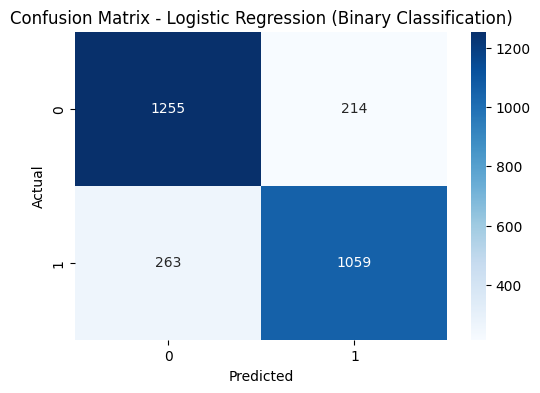

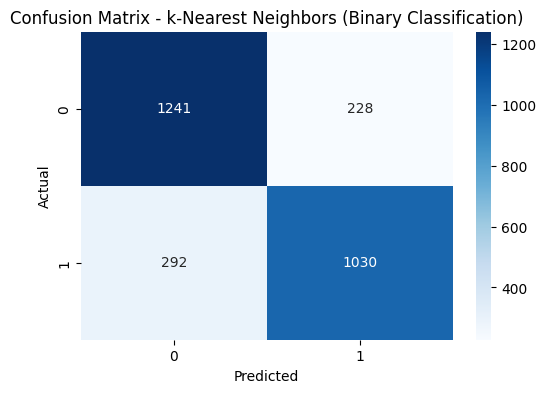

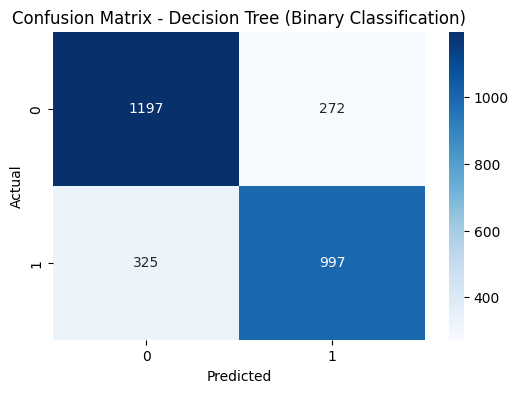

In [28]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion Matrix for Logistic Regression (Binary Classification)
cm_lr_binary = confusion_matrix(y_test, y_pred_lr_binary)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_lr_binary, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression (Binary Classification)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Confusion Matrix for k-Nearest Neighbors (Binary Classification)
cm_knn_binary = confusion_matrix(y_test, y_pred_knn_binary)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_knn_binary, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - k-Nearest Neighbors (Binary Classification)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Confusion Matrix for Decision Tree (Binary Classification)
cm_dt_binary = confusion_matrix(y_test, y_pred_dt_binary)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_dt_binary, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Decision Tree (Binary Classification)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Evaluate Logistic Regression model (Binary Classification)
accuracy_lr_binary = accuracy_score(y_test, y_pred_lr_binary)
precision_lr_binary = precision_score(y_test, y_pred_lr_binary)
recall_lr_binary = recall_score(y_test, y_pred_lr_binary)
f1_lr_binary = f1_score(y_test, y_pred_lr_binary)

print("Logistic Regression Metrics (Binary Classification):")
print(f"Accuracy: {accuracy_lr_binary:.4f}")
print(f"Precision: {precision_lr_binary:.4f}")
print(f"Recall: {recall_lr_binary:.4f}")
print(f"F1 Score: {f1_lr_binary:.4f}")
print("\nClassification Report - Logistic Regression (Binary Classification):")
print(classification_report(y_test, y_pred_lr_binary))

# Evaluate k-Nearest Neighbors model (Binary Classification)
accuracy_knn_binary = accuracy_score(y_test, y_pred_knn_binary)
precision_knn_binary = precision_score(y_test, y_pred_knn_binary)
recall_knn_binary = recall_score(y_test, y_pred_knn_binary)
f1_knn_binary = f1_score(y_test, y_pred_knn_binary)

print("\nk-Nearest Neighbors Metrics (Binary Classification, k=5):")
print(f"Accuracy: {accuracy_knn_binary:.4f}")
print(f"Precision: {precision_knn_binary:.4f}")
print(f"Recall: {recall_knn_binary:.4f}")
print(f"F1 Score: {f1_knn_binary:.4f}")
print("\nClassification Report - k-Nearest Neighbors (Binary Classification):")
print(classification_report(y_test, y_pred_knn_binary))

# Evaluate Decision Tree model (Binary Classification)
accuracy_dt_binary = accuracy_score(y_test, y_pred_dt_binary)
precision_dt_binary = precision_score(y_test, y_pred_dt_binary)
recall_dt_binary = recall_score(y_test, y_pred_dt_binary)
f1_dt_binary = f1_score(y_test, y_pred_dt_binary)

print("\nDecision Tree Metrics (Binary Classification):")
print(f"Accuracy: {accuracy_dt_binary:.4f}")
print(f"Precision: {precision_dt_binary:.4f}")
print(f"Recall: {recall_dt_binary:.4f}")
print(f"F1 Score: {f1_dt_binary:.4f}")
print("\nClassification Report - Decision Tree (Binary Classification):")
print(classification_report(y_test, y_pred_dt_binary))

Logistic Regression Metrics (Binary Classification):
Accuracy: 0.8291
Precision: 0.8319
Recall: 0.8011
F1 Score: 0.8162

Classification Report - Logistic Regression (Binary Classification):
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1469
           1       0.83      0.80      0.82      1322

    accuracy                           0.83      2791
   macro avg       0.83      0.83      0.83      2791
weighted avg       0.83      0.83      0.83      2791


k-Nearest Neighbors Metrics (Binary Classification, k=5):
Accuracy: 0.8137
Precision: 0.8188
Recall: 0.7791
F1 Score: 0.7984

Classification Report - k-Nearest Neighbors (Binary Classification):
              precision    recall  f1-score   support

           0       0.81      0.84      0.83      1469
           1       0.82      0.78      0.80      1322

    accuracy                           0.81      2791
   macro avg       0.81      0.81      0.81      2791
weighted avg   

## Binary Classification - ROC-AUC Curve Analysis

Use `roc_curve` and `auc` functions to compute and plot the ROC curve (for binary classification) and interpret the results.

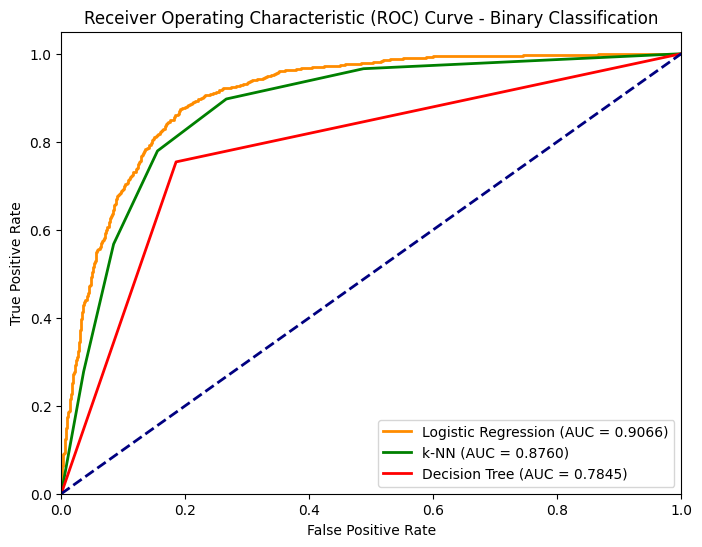


AUC Scores (Binary Classification):
Logistic Regression: 0.9066
k-Nearest Neighbors: 0.8760
Decision Tree: 0.7845


In [30]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class (class 1) for binary classification models
y_prob_lr_binary = lr_model_binary.predict_proba(X_test_processed)[:, 1]
y_prob_knn_binary = knn_model_binary.predict_proba(X_test_processed)[:, 1]
y_prob_dt_binary = dt_model_binary.predict_proba(X_test_processed)[:, 1]

# Compute ROC curve and AUC for Logistic Regression (Binary Classification)
fpr_lr_binary, tpr_lr_binary, _ = roc_curve(y_test, y_prob_lr_binary)
roc_auc_lr_binary = auc(fpr_lr_binary, tpr_lr_binary)

# Compute ROC curve and AUC for k-Nearest Neighbors (Binary Classification)
fpr_knn_binary, tpr_knn_binary, _ = roc_curve(y_test, y_prob_knn_binary)
roc_auc_knn_binary = auc(fpr_knn_binary, tpr_knn_binary)

# Compute ROC curve and AUC for Decision Tree (Binary Classification)
fpr_dt_binary, tpr_dt_binary, _ = roc_curve(y_test, y_prob_dt_binary)
roc_auc_dt_binary = auc(fpr_dt_binary, tpr_dt_binary)

# Plot ROC curves for binary classification models
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr_binary, tpr_lr_binary, color='darkorange', lw=2, label=f'Logistic Regression (AUC = {roc_auc_lr_binary:.4f})')
plt.plot(fpr_knn_binary, tpr_knn_binary, color='green', lw=2, label=f'k-NN (AUC = {roc_auc_knn_binary:.4f})')
plt.plot(fpr_dt_binary, tpr_dt_binary, color='red', lw=2, label=f'Decision Tree (AUC = {roc_auc_dt_binary:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Binary Classification')
plt.legend(loc="lower right")
plt.show()

print("\nAUC Scores (Binary Classification):")
print(f"Logistic Regression: {roc_auc_lr_binary:.4f}")
print(f"k-Nearest Neighbors: {roc_auc_knn_binary:.4f}")
print(f"Decision Tree: {roc_auc_dt_binary:.4f}")

## Binary Classification - Comparison and Conclusion

Create a summary table of all evaluation metrics for each binary classification model, discuss strengths and weaknesses, and recommend the most suitable model.

In [31]:
import pandas as pd

# Create a dictionary to store the metrics for binary classification models
metrics_data_binary = {
    'Model': ['Logistic Regression', 'k-Nearest Neighbors (k=5)', 'Decision Tree'],
    'Accuracy': [accuracy_lr_binary, accuracy_knn_binary, accuracy_dt_binary],
    'Precision': [precision_lr_binary, precision_knn_binary, precision_dt_binary],
    'Recall': [recall_lr_binary, recall_knn_binary, recall_dt_binary],
    'F1 Score': [f1_lr_binary, f1_knn_binary, f1_dt_binary],
    'AUC': [roc_auc_lr_binary, roc_auc_knn_binary, roc_auc_dt_binary]
}

# Create a pandas DataFrame from the dictionary
metrics_df_binary = pd.DataFrame(metrics_data_binary)

# Display the summary table
print("Summary Table of Model Evaluation Metrics (Binary Classification):")
display(metrics_df_binary)

Summary Table of Model Evaluation Metrics (Binary Classification):


,Model,Accuracy,Precision,Recall,F1 Score,AUC
0,Logistic Regression,0.829094,0.831893,0.801059,0.816185,0.906649
1,k-Nearest Neighbors (k=5),0.813687,0.818760,0.779123,0.798450,0.876050
2,Decision Tree,0.786098,0.785658,0.754160,0.769587,0.784500


### Discussion and Recommendation (Binary Classification)

Based on the evaluation metrics and the ROC-AUC analysis for the binary classification task (predicting bank deposit):

*   **Logistic Regression**:
    *   **Strengths**: Achieved the highest Accuracy, Precision, Recall, F1 Score, and AUC among the three models. It provides a good balance of correctly identifying both positive and negative cases. It is computationally efficient and provides insights into feature importance (although interpreting coefficients with one-hot encoding requires careful consideration).
    *   **Weaknesses**: Assumes a linear relationship between features and the log-odds of the target, which might not fully capture complex non-linear patterns in the data.
*   **k-Nearest Neighbors (k=5)**:
    *   **Strengths**: Relatively simple to understand. As a non-parametric model, it doesn't make strong assumptions about the data distribution.
    *   **Weaknesses**: Performance is sensitive to the choice of 'k' and the distance metric. Can be computationally more expensive during prediction for large datasets. Showed slightly lower performance across most metrics compared to Logistic Regression in this evaluation.
*   **Decision Tree**:
    *   **Strengths**: Easy to understand and interpret (can be visualized). Can capture non-linear relationships without requiring feature scaling.
    *   **Weaknesses**: Prone to overfitting, especially if not properly regularized (e.g., limiting depth). Showed the lowest performance across most metrics in this evaluation.

**Recommendation (Binary Classification)**:

Considering the overall strong performance across all key metrics, including Accuracy, Precision, Recall, F1 Score, and particularly the highest AUC score (0.9066), the **Logistic Regression** model is the most suitable choice among the three for this binary classification task based on the current evaluation. It demonstrated superior ability to discriminate between customers who will and will not make a deposit.

While k-NN and Decision Tree are valuable algorithms, their performance on this specific dataset, with the current configurations, was not as strong as Logistic Regression. Further hyperparameter tuning for all models could potentially lead to improvements, but based on the initial evaluation, Logistic Regression stands out as the best performing model.